In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure', figsize=(10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('plasma')

In [3]:
online_activity_df = pd.read_excel("../raw_data/Customer_Churn_Data_Large.xlsx", sheet_name='Online_Activity')
online_activity_df.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [4]:
online_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


The datatypes for the columns are in the correct format and there are no null values in the dataset.

In [5]:
# checking if all the customer IDs are unique
online_activity_df['CustomerID'].unique().size

1000

There is only one row per customer. 

In [6]:
display(online_activity_df.describe(include='object').T)
print('Unique values: ',online_activity_df['ServiceUsage'].unique())

,count,unique,top,freq
ServiceUsage,1000,3,Online Banking,349


Unique values:  ['Mobile App' 'Website' 'Online Banking']


In [7]:
online_activity_df[['LoginFrequency']].describe().T

,count,mean,std,min,25%,50%,75%,max
LoginFrequency,1000.0,25.912,14.055953,1.0,13.75,27.0,38.0,49.0


In [8]:
online_activity_df.duplicated().sum()

np.int64(0)

In [9]:
target_df = pd.read_excel("../raw_data/Customer_Churn_Data_Large.xlsx", sheet_name='Churn_Status')

Text(0.5, 1.0, 'Last Login Date Distribution')

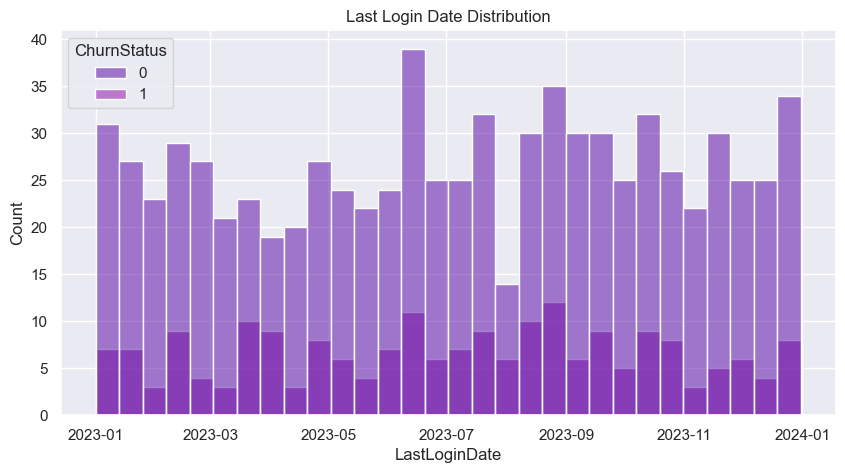

In [10]:
# plotting the last login date
sns.histplot(online_activity_df, x='LastLoginDate', bins=30, hue=target_df['ChurnStatus'], stat='count')
plt.title('Last Login Date Distribution')

There is not any direct trend that links Customer churn to last login date.

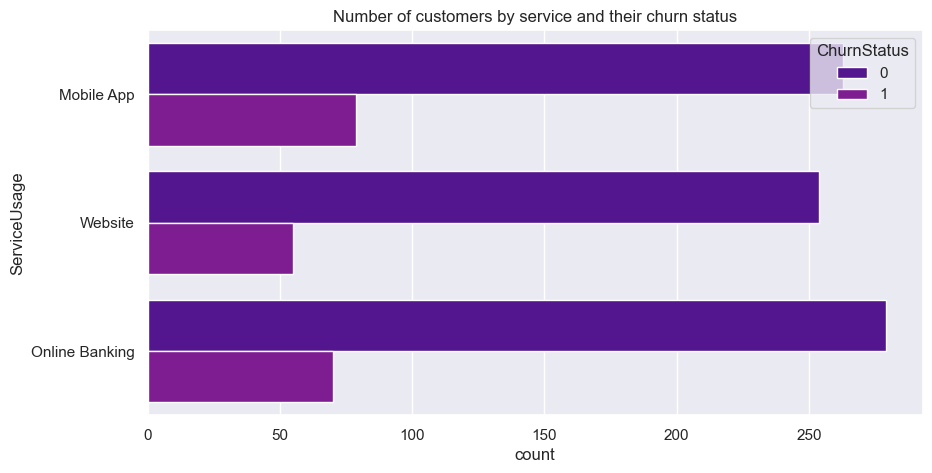

In [11]:
sns.countplot(online_activity_df, y='ServiceUsage', hue=target_df['ChurnStatus'])
plt.title("Number of customers by service and their churn status")
plt.show()

The customer use all the banking services equally.

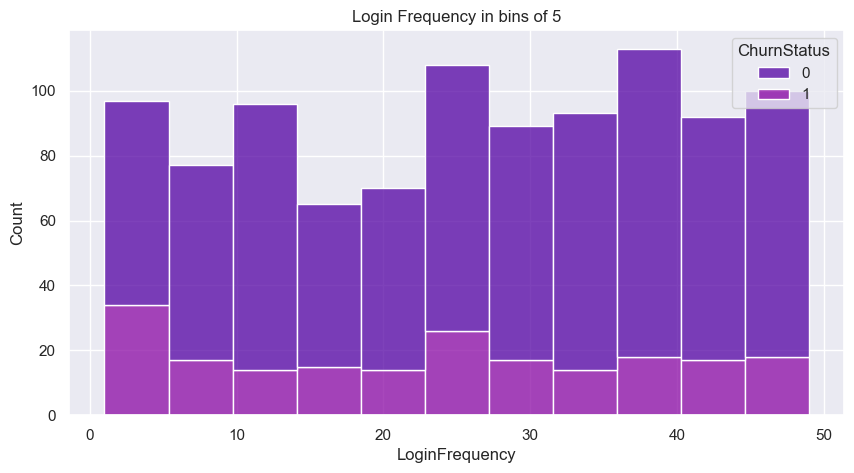

In [12]:
sns.histplot(online_activity_df, x='LoginFrequency', hue=target_df['ChurnStatus'], multiple='stack')
plt.title('Login Frequency in bins of 5')
plt.show()

The login frequencies of customers is spread across unifromly, but customers with very low login frequency tend to have churned more.

In [13]:
online_activity_df['Days_since_last_login'] = (online_activity_df['LastLoginDate'].max()-online_activity_df['LastLoginDate']).dt.days
online_activity_df.drop(columns='LastLoginDate', inplace=True)
online_activity_df.head()

,CustomerID,LoginFrequency,ServiceUsage,Days_since_last_login
0,1,34,Mobile App,71
1,2,5,Website,26
2,3,3,Website,46
3,4,2,Website,128
4,5,41,Website,65


In [14]:
# One hot encoding the categorical variable
serviceUsage = pd.get_dummies(online_activity_df['ServiceUsage'], drop_first=True, dtype=int)
online_activity_df = pd.concat([online_activity_df, serviceUsage], axis=1)
online_activity_df.drop(columns='ServiceUsage', inplace=True)
online_activity_df

,CustomerID,LoginFrequency,Days_since_last_login,Online Banking,Website
0,1,34,71,0,0
1,2,5,26,0,1
2,3,3,46,0,1
3,4,2,128,0,1
4,5,41,65,0,1
...,...,...,...,...,...
995,996,38,336,0,0
996,997,5,274,0,0
997,998,47,174,0,1
998,999,23,357,0,1


In [16]:
# exporting to csv
online_activity_df.to_csv('../processed_data/Online_Activity.csv', index=False)